# INTRODUCTION

## HOUSE PRICE PREDICTION

A house price prediction data mining model is like a smart tool that tries to guess how much a house might cost based on certain information. Imagine you have a big box of data about houses, like their size, location, and number of rooms. The model looks at all this information and tries to find patterns to make a good guess about how expensive a house might be. It's kind of like having a friend who's really good at guessing prices and can help you figure out how much a house might sell for.

# DATA MINING TECHNIQUE

## PREDICTION

Prediction data mining techniques are methods used to make predictions or forecasts about future events or trends based on patterns and relationships in existing data. These techniques analyze historical data to identify patterns and use them to predict outcomes for new data.

In the context of your project on house price prediction, prediction refers to using data mining techniques to forecast the price of a house based on various factors or features. These factors may include the size of the house, its location, the number of rooms, the neighborhood's characteristics, and other relevant variables.

The goal of prediction in your project is to develop a model that can accurately estimate the price of a house based on these features. This model can then be used by real estate agents, buyers, or sellers to get a better understanding of how much a house is worth.

# MULTIPLE LINEAR REGRESSION

Multiple linear regression is an extension of simple linear regression that allows for the prediction of a dependent variable based on two or more independent variables. In multiple linear regression, the relationship between the dependent variable (Y) and the independent variables (X1, X2, ..., Xn) is represented by the following equation:

\[ Y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n + E \]

Where: <br>
•⁠  ⁠Y is the dependent variable (the variable we want to predict).<br>
•⁠  ⁠\( b_0 \) is the intercept (the value of Y when all independent variables are 0).<br>
•⁠  ⁠\( b_1, b_2, ..., b_n \) are the coefficients that represent the change in Y for a one-unit change in each independent variable.<br>
•⁠  ⁠\( X_1, X_2, ..., X_n \) are the independent variables (the variables used to predict Y).<br>
•⁠  ⁠E is the error term, representing the difference between the predicted and actual values of Y.<br>
The goal of multiple linear regression is to find the values of the coefficients ( \( b_0, b_1, ..., b_n \) ) that minimize the sum of the squared differences between the predicted and actual values of the dependent variable. This is typically done using the method of least squares.
Multiple linear regression is commonly used in data analysis and prediction tasks where there are multiple factors that may influence the outcome. It allows for the modeling of complex relationships between variables and can provide insights into how different factors contribute to the outcome of interest.

In [17]:
# importing libraries

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import plotly.offline as py
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.express as px
import seaborn as sb
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
import math
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [13]:
#importing dataset
from google.colab import files
import pandas as pd

# Upload the JSON file
uploaded = files.upload()

# After uploading, read the file
df = pd.read_excel('Housing.xlsx')
df.head()

Saving Housing.xlsx to Housing (1).xlsx


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## DATA TRANSFORMATION

Here we are transforming the categorical data values into integral values

In [ ]:
#selecting the non-integral data columns

cat=df.select_dtypes(exclude='int')
cat.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
dummy=pd.get_dummies(df[cat.columns],drop_first=True)
dummy=dummy.astype('int')

In [ ]:
#replacing the non-integral data values into integral data values

data=df.drop(columns=cat.columns,axis=1)
data=pd.concat([data,dummy],axis=1)
data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Splitting the dataset into training and test datasets

x=data.drop('price',axis=1)
y=data['price']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

regression = LinearRegression()

(436, 13) (109, 13)
(436,) (109,)


In [19]:
regression.fit(x_train,y_train)

LinearRegression()

In [20]:
score=regression.score(x_test,y_test)
score

0.6421930074334263

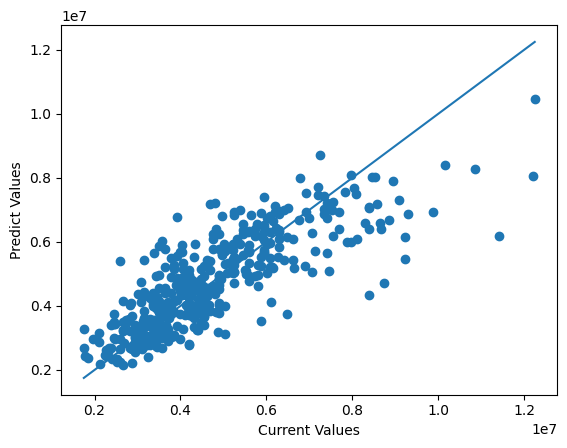

In [21]:
y_pred = cross_val_predict(regression, x_train, y_train, cv=5, n_jobs=-1)

plt.scatter(y_train, y_pred)
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()])
plt.xlabel('Current Values')
plt.ylabel('Predict Values')
plt.show()

## DATA CLEANING

Here, we are removing the outlier using the box plot technique.

<Axes: ylabel='parking'>

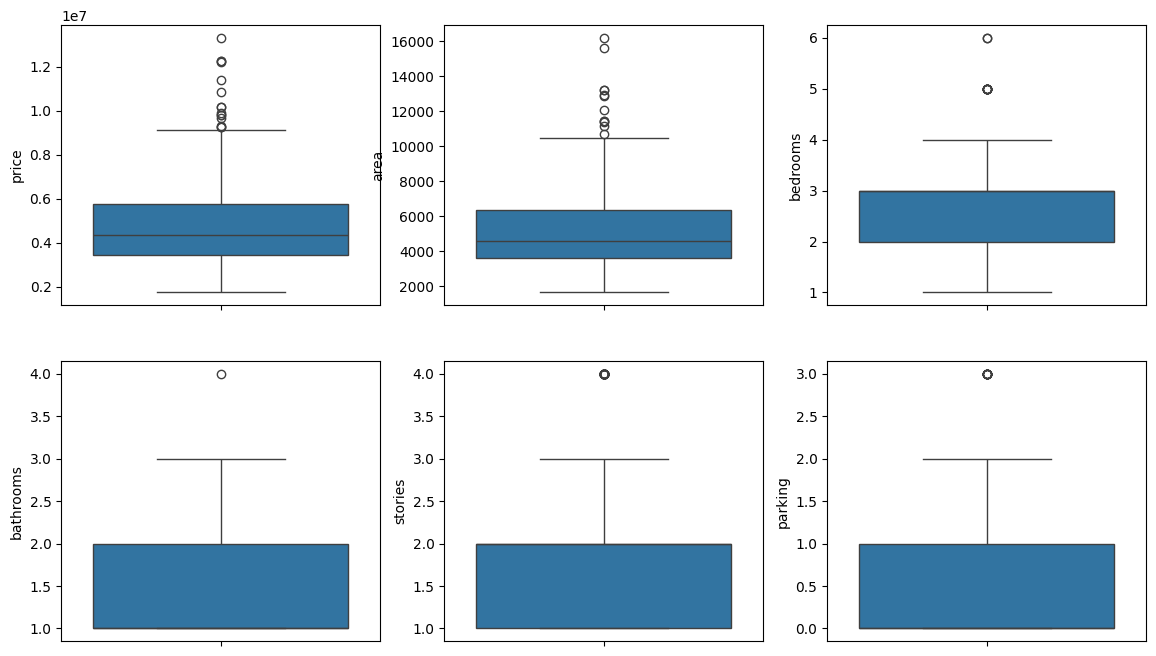

In [22]:
# Displaying all the non-categorical data in a box-plot

fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(14,8))
sb.boxplot(df['price'],ax=axs[0,0])
sb.boxplot(df['area'],ax=axs[0,1])
sb.boxplot(df['bedrooms'],ax=axs[0,2])
sb.boxplot(df['bathrooms'],ax=axs[1,0])
sb.boxplot(df['stories'],ax=axs[1,1])
sb.boxplot(df['parking'],ax=axs[1,2])

In [23]:
# removing the outliers

q1_pr=np.percentile(data['price'],25)
q2_pr=np.percentile(data['price'],75)
iqr_pr=q2_pr-q1_pr
lower_pr=q1_pr - 1.5*iqr_pr
upper_pr=q2_pr + 1.5*iqr_pr
data=data[(data['price']>=lower_pr) & (data['price']<=upper_pr)]
data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,1,0,1,0,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,1,0,1,1,0,1
17,8960000,8500,3,2,4,2,1,0,0,0,1,0,0,0
18,8890000,4600,3,2,2,2,1,1,0,0,1,0,0,0
19,8855000,6420,3,2,2,1,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [24]:
#resettign the index of df
data.reset_index(drop=True,inplace=True)

## NORMALIZATION OF DATA

Here we calculate the z-score of the prices and then plot it

In [25]:
# normalizing the price using z-score

price_mean = data['price'].mean()
price_std = data['price'].std()

price_normalized = (data['price'] - price_mean) / price_std

print("Normalized price:")
print(price_normalized)

Normalized price:
0      2.818923
1      2.818923
2      2.731210
3      2.687354
4      2.665426
         ...   
525   -1.742140
526   -1.775252
527   -1.785996
528   -1.785996
529   -1.785996
Name: price, Length: 530, dtype: float64


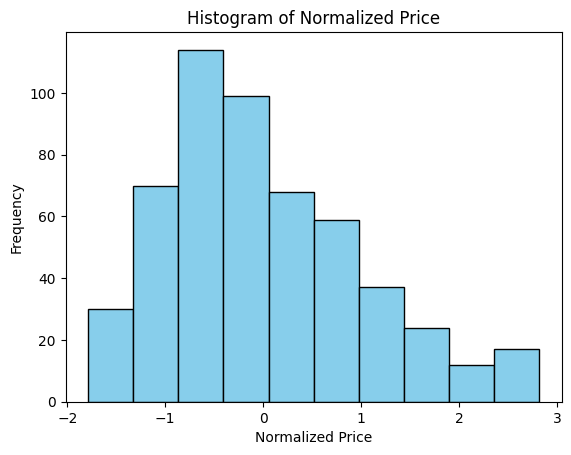

In [26]:
plt.hist(price_normalized, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Price')
plt.show()

In [27]:
# Splitting the dataset into training and test datasets

x=data.drop('price',axis=1)
y=data['price']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

regression = LinearRegression()

(424, 13) (106, 13)
(424,) (106,)


In [29]:
regression.fit(x_train,y_train)

LinearRegression()

In [30]:
score=regression.score(x_test,y_test)
score

0.651426357538252

In [31]:
pred=regression.predict(x_test)
x_test

array([[ 0.58792078,  0.11795356,  1.246033  , ...,  1.75411604,
        -0.77849894, -0.79420982],
       [-1.53944802,  0.11795356,  1.246033  , ...,  1.75411604,
        -0.77849894,  1.25911312],
       [ 1.12873382,  0.11795356,  1.246033  , ..., -0.57008771,
        -0.77849894,  1.25911312],
       ...,
       [ 2.84344434, -1.44493117, -0.64081697, ..., -0.57008771,
         1.28452326, -0.79420982],
       [-1.07501522,  0.11795356, -0.64081697, ...,  1.75411604,
        -0.77849894, -0.79420982],
       [-0.50395766,  0.11795356, -0.64081697, ..., -0.57008771,
        -0.77849894,  1.25911312]])

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
print(f"""Mean Absolute error:{mae}
Mean Squared Error: {mse}
r2 Score: {r2}""")

Mean Absolute error:812969.7330995419
Mean Squared Error: 1206978037792.9019
r2 Score: 0.651426357538252


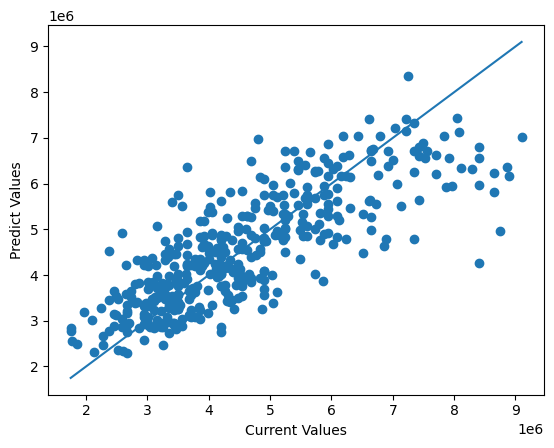

In [33]:
y_pred = cross_val_predict(regression, x_train, y_train, cv=5, n_jobs=-1)

plt.scatter(y_train, y_pred)
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()])
plt.xlabel('Current Values')
plt.ylabel('Predict Values')
plt.show()

In [35]:
def model():
    var = ["area", "bedrooms", "bathrooms", "stories", "parking", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus_semi_furnished", "furnishingstatus_unfurnished"]
    x_val = np.zeros(13)
    for i in range(13):
        x_val[i] = input(f"Enter {var[i]}:")
    mean = np.array(x.mean())
    std = np.array(x.std())
    x_val = np.array(x_val-mean)/std
    pred=regression.predict((x_val).reshape(1, -1))
    return int(pred)

In [36]:
val = math.ceil(model())
print(f"The price of the house is estimated to be Rs. {val}")

Enter area:1200
Enter bedrooms:2
Enter bathrooms:3
Enter stories:3
Enter parking:1
Enter mainroad:1
Enter guestroom:1
Enter basement:1
Enter hotwaterheating:1
Enter airconditioning:1
Enter prefarea:1
Enter furnishingstatus_semi_furnished:1
Enter furnishingstatus_unfurnished:1
The price of the house is estimated to be Rs. 7695116


<ipython-input-35-7633dd1a3515>:10: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

